In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import csv
random.seed(100)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
#import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def model_evaluation(model,x,y):
  pre=cross_val_predict(model, x, y, cv=10)
  acc = metrics.accuracy_score(y, pre)
  print("test accuracy = " + str(acc))
  classReport=classification_report(y, pre)
  print(classReport)
  cm=confusion_matrix(y, pre)
  print(cm)
  #proba = cross_val_predict(model, x, y, cv=10, method='predict_proba')
  fpr, tpr, _ = roc_curve(y,proba[:,0], pos_label='Cancer')
  roc_auc= auc(fpr, tpr)
  return acc,fpr,tpr,roc_auc



**ROC Curve for Binary cancer detection:**

In [ ]:
sd1 = pd.read_csv('RocCurveData.csv')
sd1=sd1.iloc[:1817,:]
sd1

FileNotFoundError: ignored

In [ ]:
pc=sd1.iloc[:1817,2:15]
ay=sd1.iloc[:1817,0]
pc.head()
s=np.array(sd1)
pc

In [ ]:
pc=np.array(pc)
ay=np.array(ay)
n_model=pc.shape[1]
n_model

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
acc=dict()
for i in range(n_model):
  if i==1:
    acc[i]=metrics.accuracy_score(s[:,1], s[:,i+18])
  else:
    acc[i]=metrics.accuracy_score(s[:,0], s[:,i+18])
  fpr[i], tpr[i], _ = roc_curve(s[:,0], s[:,i+2])
  roc_auc[i] = auc(fpr[i], tpr[i])
  

In [ ]:
# Plot all ROC curves
f=plt.figure()
colors = cycle(['green','aqua', 'darkorange', 'cornflowerblue','darkgreen','red','blue','magenta','cyan','lightgreen'])
models=['CancerEMC (SD1)','CancerSEEK','CancerA1DE','NaiveBayes','SVM','KNN','J48','RandomForest','DNTB','MEOFuzzyC','AdaboostM1','DeepLearning','CancerEMC']
p=[]
for i, color in zip(range(n_model), colors):
     plt.plot(fpr[i], tpr[i], color=color, lw=1.2, label=''+models[i]+' (AUC={0:0.3f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class\n\n')

l=plt.legend()
plt.grid()
#plt.style.use('classic')
for i, color in zip(range(n_model), colors):
     s=plt.plot([0],color=color, label=''+models[i]+' (Accuracy={0:0.2f}%)'.format(acc[i]*100))
     p.append(s[0])
plt.legend(handles=p,loc=6, bbox_to_anchor=(1.05, 0.5))
plt.gca().add_artist(l)
plt.figure(figsize=(20,20))
plt.show()
f.savefig("ROCBinary.pdf", bbox_inches='tight')
f.savefig("ROCBinary.png", bbox_inches='tight', dpi=2000)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**ROC Curve for Cancer Type Before of SD4:**

In [ ]:
sd2 = pd.read_csv('multi class.csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas,no. of instance,a,p,e,pre
0,NOM:,4.0,4.0,1.0,0.408718,0.000093,0.000050,1.209951e-03,5.897936e-01,1.350000e-04,1.500000e-06,1,3:'Upper GI',2:Colorectum,+,0.610
1,NOM:,4.0,4.0,1.0,0.000107,0.189284,0.000002,7.530000e-04,8.098482e-01,3.050000e-06,2.540000e-06,2,3:'Upper GI',4:Liver,+,0.516
2,NOM:,4.0,4.0,1.0,0.011083,0.057062,0.000024,4.930000e-06,9.220904e-01,8.477131e-03,1.258694e-03,3,3:'Upper GI',2:Colorectum,+,0.478
3,NOM:,4.0,4.0,1.0,0.013706,0.012354,0.000007,1.480000e-07,9.711346e-01,2.275119e-03,5.230000e-04,4,3:'Upper GI',3:Upper GI,NaN,0.735
4,NOM:,4.0,4.0,1.0,0.282833,0.012404,0.000010,3.135451e-03,7.014698e-01,1.370000e-04,1.170000e-05,5,3:'Upper GI',3:Upper GI,NaN,0.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NOM:,3.0,4.0,1.0,0.004048,0.009674,0.000232,1.117923e-02,9.748240e-01,8.800000e-07,4.250000e-05,58,6:Ovary,6:Ovary,NaN,0.432
623,NOM:,3.0,3.0,1.0,0.001559,0.024810,0.111979,5.260247e-01,9.910000e-05,2.508808e-03,3.330185e-01,59,6:Ovary,6:Ovary,NaN,1.000
624,NOM:,3.0,4.0,1.0,0.000773,0.002746,0.322221,2.099035e-01,4.643253e-01,7.010000e-06,2.470000e-05,60,6:Ovary,6:Ovary,NaN,1.000
625,NOM:,3.0,3.0,1.0,0.000004,0.001753,0.154016,8.442266e-01,1.310000e-07,1.330000e-08,7.670000e-09,61,6:Ovary,6:Ovary,NaN,1.000


**ROC Curve for Cancer Type Before Oversampling:**




In [ ]:
sd2 = pd.read_csv('19beforeSMOTE.csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas
0,NOM:,4,0,1,0.725520,0.031281,0.002632,0.001060,0.238620,0.000872,0.000015
1,NOM:,4,4,1,0.003950,0.142262,0.000171,0.000879,0.852201,0.000288,0.000248
2,NOM:,4,4,1,0.049639,0.073576,0.000242,0.000265,0.869449,0.005135,0.001694
3,NOM:,4,4,1,0.071235,0.050578,0.001507,0.000112,0.873329,0.002351,0.000888
4,NOM:,4,1,1,0.350159,0.580823,0.001395,0.010122,0.052715,0.003947,0.000839
...,...,...,...,...,...,...,...,...,...,...,...
621,NOM:,6,6,1,0.110283,0.121674,0.001558,0.193566,0.005565,0.004682,0.562671
622,NOM:,3,4,1,0.003427,0.383161,0.001749,0.007036,0.602740,0.000045,0.001842
623,NOM:,3,3,1,0.008771,0.130484,0.321636,0.447696,0.000354,0.001162,0.089898
624,NOM:,3,3,1,0.000112,0.022869,0.271249,0.660891,0.044793,0.000044,0.000041


In [ ]:
p=sd2.iloc[:,4:11]
y=sd2.iloc[:,1]
cp=sd2.iloc[:,2]
p.head()
s=np.array(sd2)

In [ ]:
p=np.array(p)
y=np.array(y)
cp=np.array(cp)
y

array([4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5,

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [ ]:
f=plt.figure()
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label=''+cnam[i]+' Cancer (area = {0:0.3f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
f.savefig("19ROCBeforeSMOTE.pdf", bbox_inches='tight')
f.savefig("19ROCBeforeSMOTE.png", bbox_inches='tight', dpi=2000)

**ROC Curve for Cancer Types After SMOTE and SMOTE**

In [ ]:
sd2 = pd.read_csv('19AfterSMOTE.csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas
0,NOM:,2,2,1,7.150000e-07,4.210485e-03,9.919478e-01,3.840947e-03,2.340000e-08,2.330000e-09,3.570000e-09
1,NOM:,2,4,1,7.225008e-03,2.230000e-04,4.070000e-04,4.130000e-04,9.914310e-01,5.080000e-06,2.960000e-04
2,NOM:,2,2,1,1.346180e-03,6.279707e-02,9.321829e-01,3.429576e-03,2.440000e-04,1.230000e-07,4.840000e-07
3,NOM:,2,2,1,6.570000e-04,7.582363e-02,4.626222e-01,4.365026e-01,2.171999e-02,1.320000e-05,2.661158e-03
4,NOM:,2,2,1,5.280000e-04,3.674349e-03,9.813656e-01,1.360298e-02,8.270000e-04,2.430000e-08,1.970000e-06
...,...,...,...,...,...,...,...,...,...,...,...
1752,NOM:,6,6,1,2.130000e-07,6.330000e-08,1.580000e-09,4.770000e-09,8.400000e-09,2.390000e-09,9.999997e-01
1753,NOM:,6,6,1,9.910000e-06,3.170000e-06,5.820000e-07,8.750000e-07,4.150000e-06,3.350000e-09,9.999813e-01
1754,NOM:,6,6,1,1.120000e-06,2.280000e-08,5.890000e-10,2.060000e-09,4.700000e-10,5.570000e-10,9.999989e-01
1755,NOM:,6,6,1,4.960000e-07,2.330000e-06,2.430000e-07,2.690000e-07,6.020000e-08,3.490000e-08,9.999966e-01


In [ ]:
sd2 = pd.read_csv('Predict(ADASYN).csv')
sd2=sd2.iloc[:,:]
sd2

,type,actual,prediction,weight,Breast,Colorectum,Upper GI,Liver,Lung,Ovary,Pancreas,inst#,actual.1,predicted,error,prediction.1
0,NOM:,4,4,1,3.490000e-04,1.030000e-04,5.770000e-04,1.870000e-06,9.989645e-01,3.020000e-07,5.400000e-06,1,5:Lung,5:Lung,NaN,0.999
1,NOM:,4,4,1,4.847708e-01,7.411839e-03,3.690000e-04,1.198101e-02,5.070000e-01,1.042302e-01,8.623905e-03,2,5:Lung,5:Lung,NaN,0.507
2,NOM:,4,4,1,5.093087e-01,1.888462e-03,7.810000e-05,2.220000e-06,4.870367e-01,1.685430e-03,3.810000e-07,3,5:Lung,5:Lung,NaN,0.820
3,NOM:,4,4,1,4.859284e-03,3.961295e-03,6.580000e-04,2.619956e-03,9.864844e-01,1.050415e-03,3.670000e-04,4,5:Lung,5:Lung,NaN,0.985
4,NOM:,4,4,1,3.110000e-08,2.800000e-07,1.540000e-06,1.750000e-08,9.999938e-01,1.760000e-06,2.570000e-06,5,5:Lung,5:Lung,NaN,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,NOM:,5,5,1,3.190000e-07,4.650000e-07,2.350000e-07,4.220000e-07,5.030000e-07,9.999973e-01,7.610000e-07,175,6:Ovary,6:Ovary,NaN,1.000
1795,NOM:,5,5,1,1.000000e-08,2.360000e-09,2.540000e-09,3.840000e-09,1.020000e-08,1.000000e+00,2.560000e-09,176,6:Ovary,6:Ovary,NaN,1.000
1796,NOM:,5,5,1,1.920000e-07,3.720000e-08,2.180000e-09,1.800000e-08,7.770000e-08,9.999997e-01,5.530000e-09,177,6:Ovary,6:Ovary,NaN,1.000
1797,NOM:,5,5,1,2.220000e-05,2.570000e-05,2.490000e-06,2.740000e-06,8.510000e-06,9.999251e-01,1.320000e-05,178,6:Ovary,6:Ovary,NaN,1.000


In [ ]:
p=sd2.iloc[:,4:11]
y=sd2.iloc[:,1]
cp=sd2.iloc[:,2]
p.head()
s=np.array(sd2)

In [ ]:
cp

0       4
1       4
2       4
3       4
4       4
       ..
1794    5
1795    5
1796    5
1797    5
1798    5
Name: prediction, Length: 1799, dtype: int64

In [ ]:
p=np.array(p)
y=np.array(y)
cp=np.array(cp)

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [ ]:
y.shape

(1799, 7)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

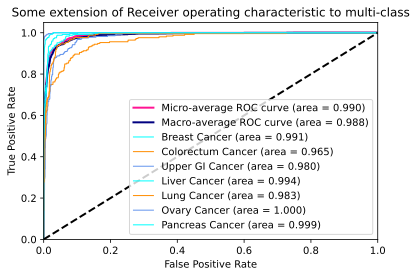

In [ ]:
f=plt.figure()
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label=''+cnam[i]+' Cancer (area = {0:0.3f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
f.savefig("19ROCAfterSMOTE.pdf", bbox_inches='tight')
f.savefig("19ROCAfterSMOTE.png", bbox_inches='tight', dpi=2000)

<Figure size 432x288 with 0 Axes>

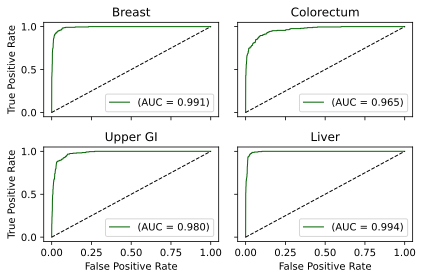

In [ ]:
f1=plt.figure()
fig, axs = plt.subplots(2, 2)
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

k=0
for m in range(2):
  for n in range(2):
    axs[m,n].plot(fpr[k], tpr[k], color='darkgreen', lw=1,
             label='(AUC = {0:0.3f})'
             ''.format(roc_auc[k]))
    axs[m,n].set_title(cnam[k])
    axs[m,n].legend(loc="lower right")
    axs[m,n].plot([0, 1], [0, 1], 'k--', lw=1)
    k=k+1

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()

fig.savefig("AllClassAfterSMOTE1.pdf", bbox_inches='tight')
fig.savefig("AllClassAfterSMOTE1.png", bbox_inches='tight', dpi=2000)


<Figure size 432x288 with 0 Axes>

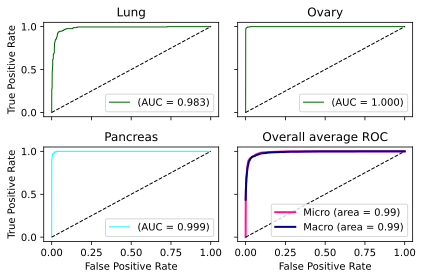

In [ ]:

f=plt.figure()
fig, axs = plt.subplots(2, 2)



cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

k=4
for m in range(2):
  for n in range(2):
    if k==6:
      break
    axs[m,n].plot(fpr[k], tpr[k], color='darkgreen', lw=1,
             label='(AUC = {0:0.3f})'
             ''.format(roc_auc[k]))
    axs[m,n].set_title(cnam[k])
    axs[m,n].legend(loc="lower right")
    axs[m,n].plot([0, 1], [0, 1], 'k--', lw=1)
    k=k+1
axs[1,0].plot(fpr[k], tpr[k], color=color, lw=1,
             label='(AUC = {0:0.3f})'
             ''.format(roc_auc[k]))
axs[1,0].set_title(cnam[k])
axs[1,0].legend(loc="lower right")
axs[1,0].plot([0, 1], [0, 1], 'k--', lw=1)


axs[1,1].plot(fpr["micro"], tpr["micro"],
         label='Micro (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)
axs[1,1].plot(fpr["macro"], tpr["macro"],
         label='Macro (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='darkblue', linestyle='-', linewidth=2)
axs[1,1].set_title('Overall average ROC')
axs[1,1].legend(loc="lower right")
axs[1,1].plot([0, 1], [0, 1], 'k--', lw=1)


for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
fig.savefig("AllClassAfterSMOTE2.pdf", bbox_inches='tight')
fig.savefig("AllClassAfterSMOTE2.png", bbox_inches='tight', dpi=2000)

In [ ]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

**Cancer Type Classification using SD4:**

In [ ]:
sd2 = pd.read_csv('multi class.csv')
sd2=sd2.iloc[:626,:]
sd2

In [ ]:
p=sd2.iloc[:,4:11]
y=sd2.iloc[:,1]
cp=sd2.iloc[:,2]
p.head()
s=np.array(sd2)

In [ ]:
cp

In [ ]:
p=np.array(p)
y=np.array(y)
cp=np.array(cp)

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

In [ ]:
y.shape

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [ ]:
# Plot all ROC curves
cnam=['Breast','Colorectum','Upper GI','Liver','Lung','Ovary','Pancreas']
plt.figure()
f = plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.3f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=2)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label=''+cnam[i]+' Cancer (area = {0:0.3f})'
             ''.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
#plt.savefig('ROCMC.png', dpi = 1200)
#f = plt.figure()
f.savefig("SD4ROCMC.pdf", bbox_inches='tight')
f.savefig("SD4ROCMC.png", bbox_inches='tight', dpi=1600)

**Cluster Corretional Heatmap of Binary Class:**

In [ ]:
 # Data set
df = pd.read_csv('SD1.csv')
df=df.iloc[:1817,:11]
df


In [ ]:
# cluster map (dendogram and tree)
#iris = sns.load_dataset("iris")
import seaborn as sns
plt.figure()
f=plt.figure()
df = pd.read_csv('SD1.csv')
df=df.iloc[:1817,:10]
df1 = df.Class
df['Classification_type']=df1
#df=df.set_index('Classification_type')
print(df)
#df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d=df.iloc[:1817,0:9]

#print(df1)

#d=d.set_index('Class')
x = dict(zip(df1.unique(),"rgb"));
print(x)
row_colors = df1.map(x)
print(row_colors)
cg = sns.clustermap(d,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.savefig("ClHMSD1.pdf", bbox_inches='tight')
plt.savefig("ClHMSD1.png", bbox_inches='tight', dpi=1600)

In [ ]:
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df

In [ ]:
plt.figure()
#df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d=df.iloc[:,0:42]
df1 = d['Tumor type']
#print(df1)
d = d.drop(columns="Sex")
#d = d.set_index('Tumor type')
f=plt.figure()
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
d=d.iloc[:,0:40]
cg = sns.clustermap(d,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.savefig("CHPSD4.pdf", bbox_inches='tight')
plt.savefig("CHPSD4.png", bbox_inches='tight', dpi=1600)

In [ ]:
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df

In [ ]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df
df = df.set_index('Tumor type')
#del df.index.Sex
df=df.iloc[:,:40]
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.clustermap(df, metric="correlation", standard_scale=1, cmap="Greens")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.savefig("CHPSD41.pdf", bbox_inches='tight')
plt.savefig("CHPSD41.png", bbox_inches='tight', dpi=1600)

In [ ]:
import seaborn as sns # for data visualization
#flight = sns.load_dataset('flights') # load flights datset from GitHub seaborn repository
df = pd.read_csv('Cancer dataset with 9.csv')
df=df.iloc[:,:10]
# reshape flights dataeset in proper format to create seaborn heatmap
flights_df = df.pivot('Class', 'OmegaScore', 'CA19-9 (U/ml)') 

sns.heatmap(flights_df)# create seaborn heatmap
df

In [ ]:
# cluster map (dendogram and tree)
#iris = sns.load_dataset("iris")
df = pd.read_csv('Cancer dataset with 9.csv')
df=df.iloc[:,:10]
#df = iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d=df.iloc[:,0:9]
df1 = df.Class
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(d,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

In [ ]:
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df

In [ ]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df.corr()
#cmap=plt.cm.Reds
sns.heatmap(cor, annot=False, cmap='BrBG')
plt.show()

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df.values
X = array[:,0:40]
Y = array[:,41]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
a=model.feature_importances_

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
#print(features)

In [ ]:
pip install sklearn

In [ ]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
data=df
#data=np.array(df)

In [ ]:
x=data.iloc[:1200,:40]
x
y=data.iloc[:1200,41]
tx=data.iloc[1201:,:40]
ty=data.iloc[1201:,41]

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.2)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x, y)

In [ ]:
sel.get_support()
selected_feat= x.columns[(sel.get_support())]
print(selected_feat)
len(selected_feat)

In [ ]:
s=pd.series(sel.estimator_,feature_importances_.ravel()).hist()

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset


In [ ]:
df = pd.read_csv('Cancer.csv')
#df=df.iloc[:,2:44]
df

In [ ]:
x=df.iloc[0:1817,3:40]
y=df.iloc[0:1817,41]
y

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x, y)
pd.Series(clf.feature_importances_, index=df.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))

In [ ]:
import numpy as np
import scipy.stats as stats


In [ ]:
x=np.array(x)

In [ ]:
u_statistic, pVal = stats.mannwhitneyu(x[1],x[2])
pVal

In [ ]:
d = pd.read_csv('SD1.csv')
d=d.iloc[:1817,:13]
d

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
#df = sns.load_dataset('iris')
#plt.figure()
sns.pairplot(d, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
plt.savefig("S2.pdf", bbox_inches='tight')
plt.savefig("S2.png", bbox_inches='tight', dpi=2000)


In [ ]:
d = pd.read_csv('SD4.csv')
d=d.iloc[:,:42]
d

In [ ]:
# library & dataset

import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure()

#sns.pairplot(d, kind="scatter", hue='Tumor type', palette="Set2")
#plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(d, kind="scatter", hue="Tumor type", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()
plt.savefig("LocalizationDataRepresentation.pdf", bbox_inches='tight')
plt.savefig("LocalizationDataRepresentation.png", bbox_inches='tight', dpi=2000)

In [ ]:
sd2 = pd.read_csv('SD2.csv')
sd2=sd2.iloc[:1817,2:]
sd2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#df = sns.load_dataset('iris')
#plt.figure()
sns.pairplot(sd2, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
plt.savefig("S1.pdf", bbox_inches='tight')
plt.savefig("S1.png", bbox_inches='tight')


In [ ]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD4.csv')
df=df.iloc[:,:42]
df
df = df.set_index('Tumor type')
#del df.index.Sex
df=df.iloc[:,:40]
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.clustermap(df, metric="correlation", standard_scale=1, cmap="Greens")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.savefig("CHPSD41.pdf", bbox_inches='tight')
plt.savefig("CHPSD41.png", bbox_inches='tight', dpi=1600)

In [ ]:
df = pd.read_csv('SD1.csv')
df=df.iloc[:1817,:42]
df

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD4.csv')
df=df.iloc[:1817,:]
df
df = df.set_index('Class')
#del df.index.Sex
df=df.iloc[:1817,:40]
print(df)
# OK now we can compare our individuals. But how do you determine the similarity between 2 cars?
# Several way to calculate that. the 2 most common ways are: correlation and euclidean distance?
sns.pairplot(sd2, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.savefig("CHPSD9.pdf", bbox_inches='tight')
plt.savefig("CHPSD9.png", bbox_inches='tight', dpi=1600)

In [ ]:
df = pd.read_csv('SD2.csv')
df=df.iloc[0:1817,2:46]
print(df)

In [ ]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
plt.figure()
df = pd.read_csv('SD2.csv')
df=df.iloc[0:1817,2:46]
print(df)
sns.pairplot(df, kind="scatter", hue="Class", markers=["o", "s"], palette="Set2")
#sns.clustermap(df, metric="correlation", standard_scale=1, cmap="Greens")
#sns.clustermap(df, metric="euclidean", standard_scale=1)
#plt.savefig("scatter.pdf", bbox_inches='tight')
plt.savefig("scatter.jpg", bbox_inches='tight')

# **Protein Biomakers Selection:**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from operator import itemgetter 

df = pd.read_csv('PBM.csv')
df=df.iloc[0:1817,:]
print(df)
x=df.iloc[0:1817,:39]
x
z=df.iloc[0:1817,:39]
f=list(x.columns) 
y=df.iloc[0:1817,39]
y
y=np.array(y)
x=np.array(x)
#np.nan_to_num(x)

      AFP (pg/ml)  Angiopoietin-2 (pg/ml)  ...  TIMP-2 (pg/ml)   class
0        1583.450                 5598.50  ...        39498.82  Cancer
1         715.308                20936.35  ...        41277.09  Cancer
2        4365.530                 2350.93  ...        28440.60  Cancer
3         715.308                 1604.34  ...        25896.73  Cancer
4         801.300                 2087.57  ...        49425.20  Cancer
...           ...                     ...  ...             ...     ...
1812      879.498                 1484.70  ...        50128.60  Cancer
1813     1337.330                 1607.90  ...        54066.98  Cancer
1814      879.498                 1592.84  ...        39844.02  Cancer
1815      879.498                 5267.95  ...        42921.13  Cancer
1816      879.498                 3546.43  ...        47219.24  Cancer

[1817 rows x 40 columns]


In [ ]:
a=np.where(np.isnan(x))
print(a[0])

[]


In [ ]:
x

array([[  1583.45 ,   5598.5  ,   3621.04 , ...,  21863.74 ,  56428.71 ,
         39498.82 ],
       [   715.308,  20936.35 ,   2772.96 , ...,  29669.66 ,  73940.49 ,
         41277.09 ],
       [  4365.53 ,   2350.93 ,   4120.77 , ...,   6020.47 ,  22797.28 ,
         28440.6  ],
       ...,
       [   879.498,   1592.84 ,   1044.45 , ...,    599.4  , 104070.89 ,
         39844.02 ],
       [   879.498,   5267.95 ,   1445.69 , ...,   6864.33 , 110579.24 ,
         42921.13 ],
       [   879.498,   3546.43 ,   1493.32 , ...,  12877.1  ,  88464.04 ,
         47219.24 ]])

[0.0151693  0.00276597 0.00106916 0.02774669 0.00495572 0.02687902
 0.01073764 0.010421   0.04322331 0.01716143 0.00286671 0.00961555
 0.00771003 0.00689815 0.00942568 0.05624039 0.02641366 0.01682598
 0.05893801 0.24674696 0.00697013 0.00860509 0.0060737  0.01100522
 0.00876309 0.05125392 0.01139109 0.08111978 0.00250017 0.05173616
 0.02996982 0.02621282 0.         0.00775987 0.00245947 0.04946362
 0.02678565 0.00712364 0.00899641]


<Figure size 432x288 with 0 Axes>

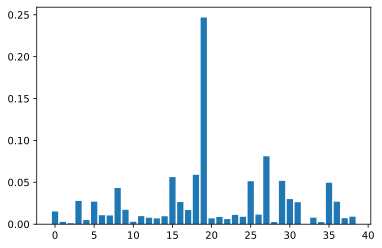

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
pyplot.figure()
f=pyplot.figure()
# load data
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
#X = dataset[:,0:8]
#y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
#plt.savefig("XGBFS.pdf", bbox_inches='tight')
f.savefig("XGBFS.png", bbox_inches='tight', dpi=600)


<Figure size 432x288 with 0 Axes>

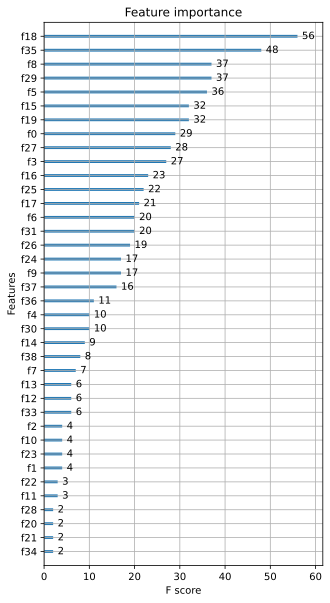

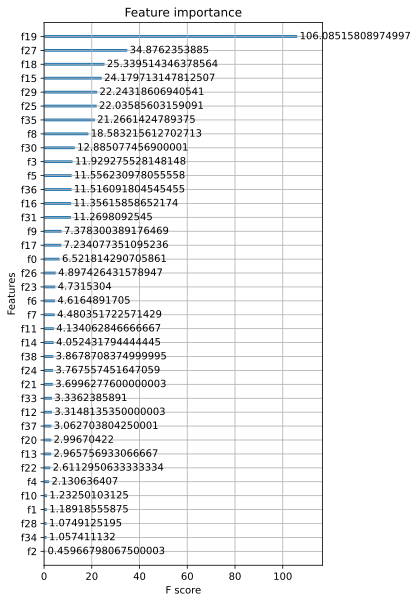

In [ ]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
f=pyplot.figure()
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# plot feature importance
ax=plot_importance(model)
fig = ax.figure
fig.set_size_inches(5, 10)
fig.savefig("XGBFS2.png", bbox_inches='tight', dpi=600)

ax = plot_importance(model,importance_type='gain')
fig = ax.figure
fig.set_size_inches(5, 10)
fig.savefig("XGBFS1.png", bbox_inches='tight', dpi=600)

In [ ]:
# use feature importance for feature selection, with fix for xgboost 1.0.2
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier


# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 96.33%
Thresh=0.000, n=39, Accuracy: 96.33%
Thresh=0.000, n=39, Accuracy: 96.33%
Thresh=0.000, n=37, Accuracy: 96.33%
Thresh=0.002, n=36, Accuracy: 96.67%
Thresh=0.003, n=35, Accuracy: 96.67%
Thresh=0.004, n=34, Accuracy: 96.83%
Thresh=0.004, n=33, Accuracy: 96.83%
Thresh=0.004, n=32, Accuracy: 97.00%
Thresh=0.005, n=31, Accuracy: 97.00%
Thresh=0.007, n=30, Accuracy: 97.00%
Thresh=0.009, n=29, Accuracy: 96.83%
Thresh=0.009, n=28, Accuracy: 96.67%
Thresh=0.009, n=27, Accuracy: 96.67%
Thresh=0.009, n=26, Accuracy: 96.83%
Thresh=0.010, n=25, Accuracy: 96.50%
Thresh=0.010, n=24, Accuracy: 97.00%
Thresh=0.010, n=23, Accuracy: 97.00%
Thresh=0.011, n=22, Accuracy: 96.67%
Thresh=0.012, n=21, Accuracy: 96.67%
Thresh=0.013, n=20, Accuracy: 96.83%
Thresh=0.014, n=19, Accuracy: 96.50%
Thresh=0.016, n=18, Accuracy: 96.83%
Thresh=0.017, n=17, Accuracy: 97.17%
Thresh=0.017, n=16, Accuracy: 97.17%
Thresh=0.017, n=15, Accuracy: 97.17%
Thresh=0.018, n=14, Accuracy: 97.17%
Thresh=0.021, n=13, A

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
view raw


In [ ]:
for i in range(68):
  x[a[0][i]][a[1][i]]=0.0

IndexError: ignored

In [ ]:
a=np.where(np.isnan(x))
print(a[1])

[]


In [ ]:
trx=x[:1200,:]
triy=y[:1200]
tx=x[1201:,:]
ty=y[1201:]

In [ ]:
a=np.where(np.isnan(x))
print(a[1])

[]


0.13089027356144137
Thrombospondin-2 (pg/ml)
['IL-8 (pg/ml)', 'IL-6 (pg/ml)', 'OPN (pg/ml)', 'Prolactin (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'GDF15 (ng/ml)', 'TGFa (pg/ml)', 'HGF (pg/ml)', 'CA19-9 (U/ml)', 'CA-125 (U/ml)', 'HE4 (pg/ml)', 'NSE (ng/ml)', 'sFas (pg/ml)', 'sEGFR (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'Myeloperoxidase (ng/ml)', 'G-CSF (pg/ml)', 'DKK1 (ng/ml)', 'TIMP-1 (pg/ml)', 'CEA (pg/ml)', 'AFP (pg/ml)', 'Midkine (pg/ml)', 'OPG (ng/ml)', 'CD44 (ng/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'FGF2 (pg/ml)', 'TIMP-2 (pg/ml)', 'Galectin-3 (ng/ml)', 'Kallikrein-6 (pg/ml)', 'Mesothelin (ng/ml)', 'Follistatin (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'sPECAM-1 (pg/ml)', 'PAR (pg/ml)', 'SHBG (nM)', 'Leptin (pg/ml)', 'AXL (pg/ml)', 'CA 15-3 (U/ml)', 'Endoglin (pg/ml)']


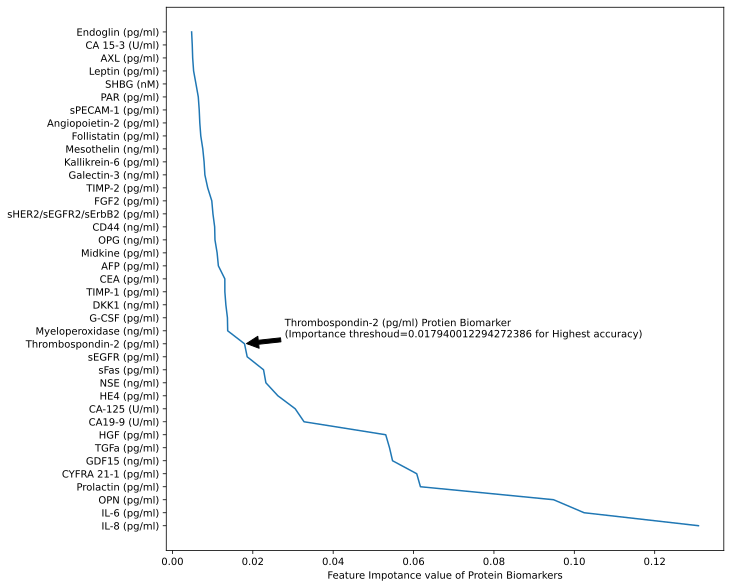

In [ ]:
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
rfc.fit(x, y)
l=[]
# Printing the name of each feature along with the gini value
for feature in zip(f, rfc.feature_importances_):
    l.append(feature)
res = sorted(l, key = itemgetter(1),reverse = True)
n=[]
m=[]
for i in res:
  m.append(i[0])
  n.append(i[1])
print(res[0][1])
plt.figure(figsize=(10,10))
#plt.hist(n, bins=39)
yv = m[14]
print(yv)
xpos = np.where(m == yv)
print(m)
xv = n[14]
s=str(yv)+" Protien Biomarker \n(Importance threshoud="+str(xv)+' for Highest accuracy)'
plt.plot(n,m)
plt.annotate(s, xy=(xv, 14), xytext=(xv+0.01, 14+0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xlabel('Feature Impotance value of Protein Biomarkers')
plt.savefig("Rffeature.pdf", bbox_inches='tight')
plt.savefig("Rffeature.png", bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.015)
sfm.fit(x, y)
#rfc.fit(trx,triy)
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])

CA-125 (U/ml)
CA19-9 (U/ml)
CYFRA 21-1 (pg/ml)
GDF15 (ng/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
NSE (ng/ml)
OPN (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
TGFa (pg/ml)
Thrombospondin-2 (pg/ml)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)
sfm = SelectFromModel(etc, threshold=0.02)
sfm.fit(x, y)
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])
    

CYFRA 21-1 (pg/ml)
GDF15 (ng/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
Myeloperoxidase (ng/ml)
NSE (ng/ml)
OPG (ng/ml)
OPN (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
TIMP-1 (pg/ml)


In [ ]:
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
 
# Creating a logistic model object
model = LogisticRegression()
#model =RandomForestClassifier()
# Identifying top 2 variables our of 4
for i in range(2,38):
   rfe_model = RFE(model, i)
   rfe_fit = rfe_model.fit(trx, triy)
   p=rfe_model.predict(tx)
   acc=metrics.accuracy_score(p,ty)
   print(i,':')
   print(' =',acc)


2 :
 = 0.18019480519480519
3 :
 = 0.18019480519480519
4 :
 = 0.22077922077922077
5 :
 = 0.30844155844155846
6 :
 = 0.28733766233766234
7 :
 = 0.3425324675324675
8 :
 = 0.3409090909090909
9 :
 = 0.3198051948051948
10 :
 = 0.4301948051948052
11 :
 = 0.4383116883116883
12 :
 = 0.45292207792207795
13 :
 = 0.4594155844155844
14 :
 = 0.49837662337662336
15 :
 = 0.5064935064935064
16 :
 = 0.5275974025974026
17 :
 = 0.5097402597402597
18 :
 = 0.5113636363636364
19 :
 = 0.5146103896103896
20 :
 = 0.49512987012987014
21 :
 = 0.5503246753246753
22 :
 = 0.5811688311688312
23 :
 = 0.5535714285714286
24 :
 = 0.5194805194805194
25 :
 = 0.5194805194805194
26 :
 = 0.5503246753246753
27 :
 = 0.5081168831168831
28 :
 = 0.5941558441558441
29 :
 = 0.5909090909090909
30 :
 = 0.5925324675324676
31 :
 = 0.5941558441558441
32 :
 = 0.5941558441558441
33 :
 = 0.5941558441558441
34 :
 = 0.5974025974025974
35 :
 = 0.5892857142857143
36 :
 = 0.5876623376623377
37 :
 = 0.5925324675324676


In [ ]:
model = LogisticRegression()

rfe_model = RFE(model, 25)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)

CA-125 (U/ml)
CA19-9 (U/ml)
CEA (pg/ml)
CYFRA 21-1 (pg/ml)
Endoglin (pg/ml)
FGF2 (pg/ml)
G-CSF (pg/ml)
HE4 (pg/ml)
HGF (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
Kallikrein-6 (pg/ml)
Midkine (pg/ml)
Myeloperoxidase (ng/ml)
NSE (ng/ml)
OPN (pg/ml)
PAR (pg/ml)
Prolactin (pg/ml)
sEGFR (pg/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
sPECAM-1 (pg/ml)
TGFa (pg/ml)
TIMP-1 (pg/ml)
TIMP-2 (pg/ml)
accuray= 0.8315905338470005


In [ ]:
model =RandomForestClassifier()

rfe_model = RFE(model, 6)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)
model.fit(x,y)
print(model.feature_importances_)

CYFRA 21-1 (pg/ml)
IL-6 (pg/ml)
IL-8 (pg/ml)
OPN (pg/ml)
Prolactin (pg/ml)
TGFa (pg/ml)
accuray= 1.0
[0.01139622 0.00611803 0.00614433 0.02801202 0.00520447 0.03318256
 0.01211497 0.01184497 0.05163403 0.01566753 0.00443058 0.01031175
 0.00734773 0.01102313 0.01445699 0.05298009 0.02465911 0.04922929
 0.10896148 0.14107873 0.00717419 0.00653151 0.00633879 0.01128817
 0.00879893 0.02411981 0.01274917 0.08636556 0.00684852 0.06750079
 0.01783669 0.02220171 0.00684805 0.00794029 0.00714411 0.05933323
 0.01546536 0.0121409  0.00757621]


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
 
# Creating a logistic model object
model = LogisticRegression()
model =RandomForestClassifier()
# Identifying top 2 variables our of 4
for i in range(2,35):
   rfe_model = RFE(model, i)
   rfe_fit = rfe_model.fit(trx, triy)
   X_new = rfe_model.fit_transform(trx, triy)
   p=rfe_model.predict(tx)
   acc=metrics.accuracy_score(p,ty)
   print(i,':')
   print(' =',acc)


2 :
 = 0.4577922077922078
3 :
 = 0.4512987012987013
4 :
 = 0.4496753246753247
5 :
 = 0.7061688311688312
6 :
 = 0.5292207792207793
7 :
 = 0.6477272727272727


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('SD4.csv')
df=df.iloc[0:,:]
print(df)
x=df.iloc[:,1:40]
x
f=list(x.columns) 
y=df.iloc[0:,41]
y
y=np.array(y)
x=np.array(x)


     OmegaScore  AFP (pg/ml)  ...  Tumor type  AJCC Stage
0          0.86      781.392  ...      Breast         III
1          0.39      781.392  ...      Breast          II
2          0.98     5870.640  ...      Breast          II
3          1.31     1752.170  ...      Breast          II
4          1.03      959.916  ...      Breast          II
..          ...          ...  ...         ...         ...
621        1.79     1956.220  ...    Upper GI           I
622        1.10     5393.210  ...    Upper GI          II
623        0.73      959.916  ...    Upper GI           I
624        1.98     7963.520  ...    Upper GI           I
625        4.18   114364.320  ...    Upper GI          II

[626 rows x 43 columns]


In [ ]:
trx=x[:500,:]
triy=y[:500]
tx=x[501:,:]
ty=y[501:]

In [ ]:
x

In [ ]:
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
 
# Fitting the classifier
rfc.fit(x, y)
l=[]
# Printing the name of each feature along with the gini value
for feature in zip(f, rfc.feature_importances_):
    l.append(feature)
res = sorted(l, key = itemgetter(1),reverse = True)
n=[]
m=[]
for i in res:
  m.append(i[0])
  n.append(i[1])
print(res[0][1])


NameError: ignored

IL-6 (pg/ml)
['sFas (pg/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'CA-125 (U/ml)', 'CA19-9 (U/ml)', 'Leptin (pg/ml)', 'AFP (pg/ml)', 'TIMP-2 (pg/ml)', 'TGFa (pg/ml)', 'CA 15-3 (U/ml)', 'HGF (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'CD44 (ng/ml)', 'NSE (ng/ml)', 'GDF15 (ng/ml)', 'Prolactin (pg/ml)', 'CEA (pg/ml)', 'IL-8 (pg/ml)', 'Midkine (pg/ml)', 'IL-6 (pg/ml)', 'TIMP-1 (pg/ml)', 'OPG (ng/ml)', 'Myeloperoxidase (ng/ml)', 'SHBG (nM)', 'Mesothelin (ng/ml)', 'DKK1 (ng/ml)', 'Galectin-3 (ng/ml)', 'AXL (pg/ml)', 'HE4 (pg/ml)', 'OPN (pg/ml)', 'sPECAM-1 (pg/ml)', 'Kallikrein-6 (pg/ml)', 'Endoglin (pg/ml)', 'FGF2 (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'G-CSF (pg/ml)', 'sEGFR (pg/ml)', 'PAR (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'Follistatin (pg/ml)']


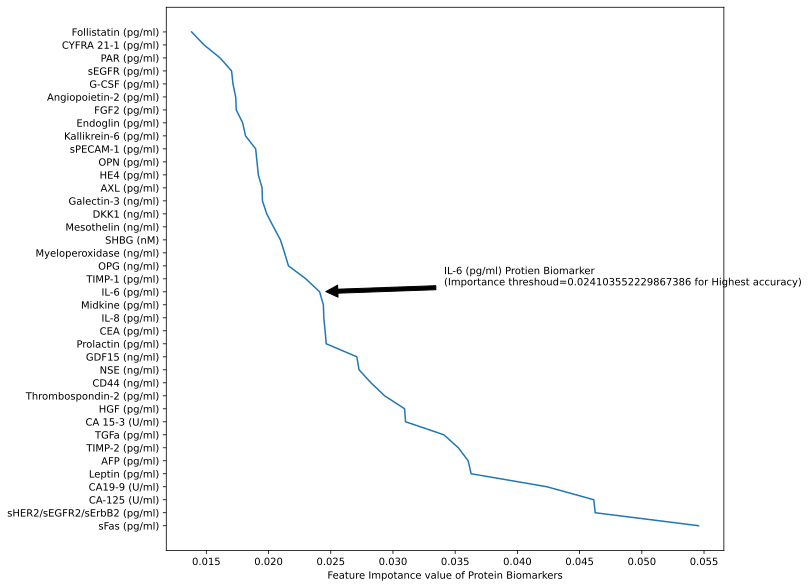

In [ ]:
plt.figure(figsize=(10,10))
#plt.hist(n, bins=39)
yv = m[18]
print(yv)
xpos = np.where(m == yv)
print(m)
xv = n[18]
s=str(yv)+" Protien Biomarker \n(Importance threshoud="+str(xv)+' for Highest accuracy)'
plt.plot(n,m)
plt.annotate(s, xy=(xv, 18), xytext=(xv+0.01, 18+0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.xlabel('Feature Impotance value of Protein Biomarkers')
plt.savefig("SD4feature.pdf", bbox_inches='tight')
plt.savefig("SD4feature.png", bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.025)
sfm.fit(x, y)
#rfc.fit(trx,triy)
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])

AFP (pg/ml)
CA-125 (U/ml)
CA 15-3 (U/ml)
CA19-9 (U/ml)
CD44 (ng/ml)
GDF15 (ng/ml)
HGF (pg/ml)
Leptin (pg/ml)
NSE (ng/ml)
sFas (pg/ml)
sHER2/sEGFR2/sErbB2 (pg/ml)
TGFa (pg/ml)
Thrombospondin-2 (pg/ml)
TIMP-2 (pg/ml)


In [ ]:
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
 
# Creating a logistic model object
#model = LogisticRegression()
model =RandomForestClassifier()
# Identifying top 2 variables our of 4
for i in range(2,38):
   rfe_model = RFE(model, i)
   rfe_fit = rfe_model.fit(trx, triy)
   p=rfe_model.predict(tx)
   acc=metrics.accuracy_score(p,ty)
   print(i,':')
   print(' =',acc)

In [ ]:
model = LogisticRegression()

rfe_model = RFE(model, 25)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)

In [ ]:
model = RandomForestClassifier()

rfe_model = RFE(model, 13)
rfe_fit = rfe_model.fit(x, y)
p=rfe_model.predict(x)
acc=metrics.accuracy_score(p,y)
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(f[feature_list_index])
print('accuray=',acc)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)
sfm = SelectFromModel(etc, threshold=0.02)
sfm.fit(x, y)
for feature_list_index in sfm.get_support(indices=True):
    print(f[feature_list_index])

NameError: ignored

<Figure size 432x288 with 0 Axes>

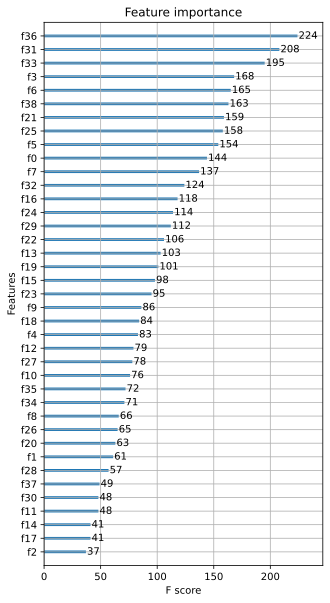

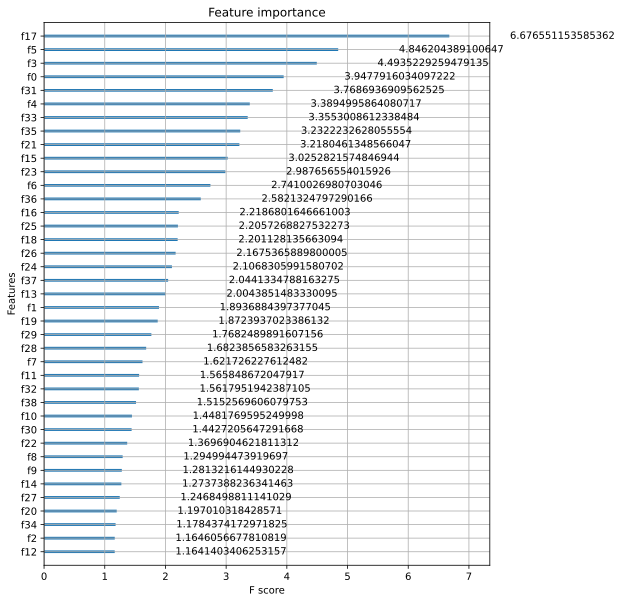

In [ ]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
f=pyplot.figure()
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# plot feature importance
ax=plot_importance(model)
fig = ax.figure
fig.set_size_inches(5, 10)
fig.savefig("SD4XGBFS2.png", bbox_inches='tight', dpi=600)

ax = plot_importance(model,importance_type='gain')
fig = ax.figure
fig.set_size_inches(8, 10)
fig.savefig("SD4XGBFS1.png", bbox_inches='tight', dpi=600)

In [ ]:
# use feature importance for feature selection, with fix for xgboost 1.0.2
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 69.57%
Thresh=0.009, n=39, Accuracy: 69.57%
Thresh=0.010, n=38, Accuracy: 69.08%
Thresh=0.010, n=37, Accuracy: 69.08%
Thresh=0.010, n=36, Accuracy: 69.57%
Thresh=0.012, n=35, Accuracy: 69.57%
Thresh=0.012, n=34, Accuracy: 71.01%
Thresh=0.014, n=33, Accuracy: 71.50%
Thresh=0.014, n=32, Accuracy: 69.08%
Thresh=0.015, n=31, Accuracy: 67.63%
Thresh=0.015, n=30, Accuracy: 68.60%
Thresh=0.015, n=29, Accuracy: 70.53%
Thresh=0.016, n=28, Accuracy: 67.63%
Thresh=0.016, n=27, Accuracy: 67.15%
Thresh=0.017, n=26, Accuracy: 67.15%
Thresh=0.018, n=25, Accuracy: 66.18%
Thresh=0.020, n=24, Accuracy: 68.60%
Thresh=0.020, n=23, Accuracy: 67.63%
Thresh=0.021, n=22, Accuracy: 66.18%
Thresh=0.023, n=21, Accuracy: 68.60%
Thresh=0.024, n=20, Accuracy: 63.77%
Thresh=0.025, n=19, Accuracy: 66.18%
Thresh=0.026, n=18, Accuracy: 65.22%
Thresh=0.027, n=17, Accuracy: 66.67%
Thresh=0.029, n=16, Accuracy: 64.73%
Thresh=0.029, n=15, Accuracy: 64.73%
Thresh=0.030, n=14, Accuracy: 69.57%
Thresh=0.031, n=13, A

In [ ]:
SMOTE

**SMOTE:**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [ ]:
d = pd.read_csv('CamcerTypeDataset19FeatureBeforeOversampling.csv')
d

,OmegaScore,'AFP (pg/ml)','CA-125 (U/ml)','CA 15-3 (U/ml)','CA19-9 (U/ml)','CD44 (ng/ml)','CEA (pg/ml)','GDF15 (ng/ml)','HGF (pg/ml)','IL-8 (pg/ml)','Leptin (pg/ml)','NSE (ng/ml)','Prolactin (pg/ml)','sFas (pg/ml)','sHER2/sEGFR2/sErbB2 (pg/ml)','TGFa (pg/ml)','Thrombospondin-2 (pg/ml)','TIMP-2 (pg/ml)',Sex,Tumor type
0,0.86,781.392,64.310,18.70,24.290,16.64,2390.97,0.75,158.340,32.690,96112.28,12.20,61562.84,202.158,7111.76,16.104,2229.275,65372.89,0.0,Breast
1,0.39,781.392,4.770,5.61,15.798,20.16,1271.43,0.82,158.334,27.762,24860.31,9.83,113474.51,202.158,8477.96,16.104,2229.275,58639.44,0.0,Breast
2,0.98,5870.640,10.970,20.18,22.690,16.16,1235.59,0.20,379.190,11.670,15997.47,95.34,11701.29,1998.710,4854.77,16.152,2020.510,41502.75,0.0,Breast
3,1.31,1752.170,6.680,7.44,16.134,15.13,465.30,0.35,1048.550,8.160,96591.86,21.01,15233.98,1823.730,3468.72,16.152,2020.510,29890.83,0.0,Breast
4,1.03,959.916,4.896,6.19,17.010,22.86,1432.20,0.31,353.810,8.460,21289.59,55.29,12424.87,1162.730,5576.42,16.152,4584.260,27219.12,0.0,Breast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.10,5393.210,5.770,16.08,16.692,18.46,2552.40,2.06,216.750,10.510,17618.21,5.71,203448.56,1638.090,6902.77,16.542,1774.615,44563.80,1.0,'Upper GI'
623,0.73,959.916,6.680,19.42,534.150,9.49,1093.75,0.35,340.830,30.790,3151.20,8.63,10878.88,1267.240,2580.30,16.152,2020.510,30929.41,1.0,'Upper GI'
624,1.98,7963.520,4.896,7.70,16.134,21.59,2281.50,0.47,159.876,8.160,171646.44,7.51,18962.30,2349.710,2859.37,16.152,2020.510,33947.65,0.0,'Upper GI'
625,4.18,114364.320,5.230,10.41,21.410,27.76,2192.00,1.61,273.800,23.420,12337.23,5.48,33540.65,1362.280,4507.60,16.488,14123.670,27983.10,1.0,'Upper GI'


In [ ]:
d.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF', 'IL-8', 'Leptin', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']

In [ ]:
X = d.iloc[:626,:19].values
y = d.iloc[:626,-1].values
X

array([[8.6000000e-01, 7.8139200e+02, 6.4310000e+01, ..., 2.2292750e+03,
        6.5372890e+04, 0.0000000e+00],
       [3.9000000e-01, 7.8139200e+02, 4.7700000e+00, ..., 2.2292750e+03,
        5.8639440e+04, 0.0000000e+00],
       [9.8000000e-01, 5.8706400e+03, 1.0970000e+01, ..., 2.0205100e+03,
        4.1502750e+04, 0.0000000e+00],
       ...,
       [7.3000000e-01, 9.5991600e+02, 6.6800000e+00, ..., 2.0205100e+03,
        3.0929410e+04, 1.0000000e+00],
       [1.9800000e+00, 7.9635200e+03, 4.8960000e+00, ..., 2.0205100e+03,
        3.3947650e+04, 0.0000000e+00],
       [4.1800000e+00, 1.1436432e+05, 5.2300000e+00, ..., 1.4123670e+04,
        2.7983100e+04, 1.0000000e+00]])

In [ ]:
counter = Counter(y)
counter

Counter({"'Upper GI'": 80,
         'Breast': 70,
         'Colorectum': 252,
         'Liver': 43,
         'Lung': 61,
         'Ovary': 53,
         'Pancreas': 67})

Counter({'Breast': 252, 'Colorectum': 252, "'Upper GI'": 252, 'Liver': 252, 'Lung': 252, 'Ovary': 252, 'Pancreas': 252})


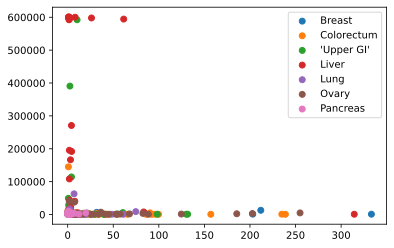

In [ ]:
oversample = SMOTE()
x1, y1 = oversample.fit_resample(X, y)
counter = Counter(y1)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(x1[row_ix, 0], x1[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
df = pd.DataFrame (x1)
df['class'] = y1
df.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF', 'IL-8', 'Leptin', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']
df.to_csv (r'SMOTE_Type_feature19Dataset.csv', index = False, header=True)

Class Imbalance: **ADASYN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
%matplotlib inline

In [ ]:
bd = pd.read_csv('BinaryRFfeature19Dataset.csv')
bd

,'CA-125 (U/ml)','CA19-9 (U/ml)','CYFRA 21-1 (pg/ml)','GDF15 (ng/ml)','HE4 (pg/ml)','HGF (pg/ml)','IL-6 (pg/ml)','IL-8 (pg/ml)','NSE (ng/ml)','OPN (pg/ml)','Prolactin (pg/ml)','sEGFR (pg/ml)','sFas (pg/ml)','TGFa (pg/ml)','Thrombospondin-2 (pg/ml)','Omega Score',Age,Sex,Race,Class
0,5.090,16.452,1938.654,0.53,3857.712,377.26,11.316,8.238,12.04,56516.58,11606.60,3284.17,204.792,16.086,21863.74,2.96,60,1,1,Cancer
1,7.270,40.910,1938.654,2.39,5779.110,659.68,21.280,29.820,23.25,61001.39,14374.99,1911.81,204.792,16.086,29669.66,2.45,59,0,1,Cancer
2,4.854,16.452,1976.940,0.50,3857.712,329.07,11.316,35.060,12.84,88896.24,38375.00,1743.94,204.792,179.030,6020.47,1.22,69,0,1,Cancer
3,5.390,16.452,1938.654,0.19,7819.170,266.66,15.300,15.890,22.79,42549.61,12072.51,1059.24,204.792,16.086,4331.02,1.64,70,0,1,Cancer
4,4.854,16.452,1938.654,0.30,3857.712,370.88,11.316,8.238,27.20,24274.11,23718.17,1736.92,204.792,16.086,2311.91,1.33,43,0,1,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,24.820,42.390,1970.916,0.41,4113.462,284.34,10.500,12.830,9.72,38603.84,58266.97,2542.26,207.240,16.890,599.40,0.98,55,0,1,Cancer
1813,5.580,16.440,1970.916,0.34,4113.462,374.03,10.500,8.274,79.03,29994.01,187828.79,1670.22,207.240,16.890,599.40,3.92,57,0,1,Cancer
1814,30.480,16.440,3590.000,0.86,48893.330,309.22,10.500,11.160,4.30,93601.15,241440.02,1194.03,207.240,16.890,599.40,7.96,60,0,1,Cancer
1815,1469.450,62.260,50659.050,0.69,16014.510,1153.70,20.330,20.540,19.52,145116.62,140145.70,1607.16,207.240,16.890,6864.33,0.81,49,0,1,Cancer


In [ ]:
bd['Class'].value_counts()

Cancer    1005
Normal     812
Name: Class, dtype: int64

In [ ]:
m = bd.iloc[:1817,:19].values
n = bd.iloc[:1817,-1].values
n

array(['Cancer', 'Cancer', 'Cancer', ..., 'Cancer', 'Cancer', 'Cancer'],
      dtype=object)

In [ ]:
ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)

In [ ]:
solutions = np.argwhere(m == '?')
print(solutions)

[]


In [ ]:
m_res, n_res = ada.fit_resample(m,n)
print('Oversampled Target Variable Distribution:', Counter(n_res))

Oversampled Target Variable Distribution: Counter({'Cancer': 1005, 'Normal': 961})


In [ ]:
df = pd.DataFrame (m_res)
df['class'] = n_res
df
df.to_csv (r'ADASYNBinaryRFfeature19Dataset.csv', index = False, header=True)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=1000,
                  n_jobs=None, oob_score=true, random_state=4, verbose=1,
                  warm_start=False)
model_evaluation(bag,m_res, n_res)
bag

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

test accuracy = 0.9038657171922686
              precision    recall  f1-score   support

      Cancer       0.91      0.91      0.91      1005
      Normal       0.90      0.90      0.90       961

    accuracy                           0.90      1966
   macro avg       0.90      0.90      0.90      1966
weighted avg       0.90      0.90      0.90      1966

[[911  94]
 [ 95 866]]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=1000,
                  n_jobs=None, oob_score=False, random_state=4, verbose=1,
                  warm_start=False)

In [ ]:
RF=RandomForestClassifier(n_estimators = 100)
model_evaluation(RF,m_res, n_res)

test accuracy = 0.930824008138352
              precision    recall  f1-score   support

      Cancer       0.93      0.93      0.93      1005
      Normal       0.93      0.93      0.93       961

    accuracy                           0.93      1966
   macro avg       0.93      0.93      0.93      1966
weighted avg       0.93      0.93      0.93      1966

[[935  70]
 [ 66 895]]


In [ ]:
pip install sklearn-template

     |████████████████████████████████| 163kB 2.7MB/s 
  Created wheel for sklearn-template: filename=sklearn_template-0.0.3-cp36-none-any.whl size=2120 sha256=b03e088a0ab2e5844b28585d72a5fe7855d521a6bc41209472ab2bc5f41db9fc
  Stored in directory: /root/.cache/pip/wheels/9d/77/92/f4b7f26738722233e8c3c032d97a85eda49c3b5e1a4539a954
Successfully built sklearn-template


In [ ]:
from skltemplate import TemplateEstimator
estimator = TemplateEstimator()

ModuleNotFoundError: ignored

In [ ]:
data = pd.read_csv('CamcerTypeDataset19FeatureBeforeOversampling.csv')
data

,OmegaScore,'AFP (pg/ml)','CA-125 (U/ml)','CA 15-3 (U/ml)','CA19-9 (U/ml)','CD44 (ng/ml)','CEA (pg/ml)','GDF15 (ng/ml)','HGF (pg/ml)','IL-8 (pg/ml)','Leptin (pg/ml)','NSE (ng/ml)','Prolactin (pg/ml)','sFas (pg/ml)','sHER2/sEGFR2/sErbB2 (pg/ml)','TGFa (pg/ml)','Thrombospondin-2 (pg/ml)','TIMP-2 (pg/ml)',Sex,Tumor type
0,0.86,781.392,64.310,18.70,24.290,16.64,2390.97,0.75,158.340,32.690,96112.28,12.20,61562.84,202.158,7111.76,16.104,2229.275,65372.89,0.0,Breast
1,0.39,781.392,4.770,5.61,15.798,20.16,1271.43,0.82,158.334,27.762,24860.31,9.83,113474.51,202.158,8477.96,16.104,2229.275,58639.44,0.0,Breast
2,0.98,5870.640,10.970,20.18,22.690,16.16,1235.59,0.20,379.190,11.670,15997.47,95.34,11701.29,1998.710,4854.77,16.152,2020.510,41502.75,0.0,Breast
3,1.31,1752.170,6.680,7.44,16.134,15.13,465.30,0.35,1048.550,8.160,96591.86,21.01,15233.98,1823.730,3468.72,16.152,2020.510,29890.83,0.0,Breast
4,1.03,959.916,4.896,6.19,17.010,22.86,1432.20,0.31,353.810,8.460,21289.59,55.29,12424.87,1162.730,5576.42,16.152,4584.260,27219.12,0.0,Breast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.10,5393.210,5.770,16.08,16.692,18.46,2552.40,2.06,216.750,10.510,17618.21,5.71,203448.56,1638.090,6902.77,16.542,1774.615,44563.80,1.0,'Upper GI'
623,0.73,959.916,6.680,19.42,534.150,9.49,1093.75,0.35,340.830,30.790,3151.20,8.63,10878.88,1267.240,2580.30,16.152,2020.510,30929.41,1.0,'Upper GI'
624,1.98,7963.520,4.896,7.70,16.134,21.59,2281.50,0.47,159.876,8.160,171646.44,7.51,18962.30,2349.710,2859.37,16.152,2020.510,33947.65,0.0,'Upper GI'
625,4.18,114364.320,5.230,10.41,21.410,27.76,2192.00,1.61,273.800,23.420,12337.23,5.48,33540.65,1362.280,4507.60,16.488,14123.670,27983.10,1.0,'Upper GI'


In [ ]:
data.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF', 'IL-8', 'Leptin', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']

In [ ]:
data['Tumor type'].value_counts()

Colorectum    252
'Upper GI'     80
Breast         70
Pancreas       67
Lung           61
Ovary          53
Liver          43
Name: Tumor type, dtype: int64

In [ ]:
X = data.iloc[:626,:19].values
y = data.iloc[:626,-1].values
X

array([[8.6000000e-01, 7.8139200e+02, 6.4310000e+01, ..., 2.2292750e+03,
        6.5372890e+04, 0.0000000e+00],
       [3.9000000e-01, 7.8139200e+02, 4.7700000e+00, ..., 2.2292750e+03,
        5.8639440e+04, 0.0000000e+00],
       [9.8000000e-01, 5.8706400e+03, 1.0970000e+01, ..., 2.0205100e+03,
        4.1502750e+04, 0.0000000e+00],
       ...,
       [7.3000000e-01, 9.5991600e+02, 6.6800000e+00, ..., 2.0205100e+03,
        3.0929410e+04, 1.0000000e+00],
       [1.9800000e+00, 7.9635200e+03, 4.8960000e+00, ..., 2.0205100e+03,
        3.3947650e+04, 0.0000000e+00],
       [4.1800000e+00, 1.1436432e+05, 5.2300000e+00, ..., 1.4123670e+04,
        2.7983100e+04, 1.0000000e+00]])

In [ ]:
print('Shape of Feature Matrix:', X.shape)
print('Shape of Target Vector:', y.shape)

Shape of Feature Matrix: (626, 19)
Shape of Target Vector: (626,)


In [ ]:
from collections import Counter
print('Original Target Variable Distribution:', Counter(y))

Original Target Variable Distribution: Counter({'Colorectum': 252, "'Upper GI'": 80, 'Breast': 70, 'Pancreas': 67, 'Lung': 61, 'Ovary': 53, 'Liver': 43})


In [ ]:
ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)

In [ ]:
X_res, y_res = ada.fit_resample(X,y)
print('Oversampled Target Variable Distribution:', Counter(y_res))

Oversampled Target Variable Distribution: Counter({'Colorectum': 252, 'Liver': 247, "'Upper GI'": 80, 'Breast': 70, 'Pancreas': 67, 'Lung': 61, 'Ovary': 53})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
for i in range(5):
  X_res, y_res = ada.fit_resample(X_res, y_res)
  print('Oversampled Target Variable Distribution:', Counter(y_res))

Oversampled Target Variable Distribution: Counter({'Ovary': 262, 'Colorectum': 252, 'Liver': 247, "'Upper GI'": 80, 'Breast': 70, 'Pancreas': 67, 'Lung': 61})
Oversampled Target Variable Distribution: Counter({'Ovary': 262, 'Lung': 259, 'Colorectum': 252, 'Liver': 247, "'Upper GI'": 80, 'Breast': 70, 'Pancreas': 67})
Oversampled Target Variable Distribution: Counter({'Ovary': 262, 'Lung': 259, 'Pancreas': 256, 'Colorectum': 252, 'Liver': 247, "'Upper GI'": 80, 'Breast': 70})
Oversampled Target Variable Distribution: Counter({'Ovary': 262, 'Lung': 259, 'Pancreas': 256, 'Colorectum': 252, 'Breast': 247, 'Liver': 247, "'Upper GI'": 80})
Oversampled Target Variable Distribution: Counter({"'Upper GI'": 276, 'Ovary': 262, 'Lung': 259, 'Pancreas': 256, 'Colorectum': 252, 'Breast': 247, 'Liver': 247})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
Counter(y_res)

Counter({"'Upper GI'": 276,
         'Breast': 247,
         'Colorectum': 252,
         'Liver': 247,
         'Lung': 259,
         'Ovary': 262,
         'Pancreas': 256})

In [ ]:
df = pd.DataFrame (X_res)
df['class'] = y_res
df
df.to_csv (r'ADSYNdataset19Features.csv', index = False, header=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=7)
print('Shape of Feature Matrix:', X_train.shape)
print('Shape of Target Vector:', X_test.shape)

Shape of Feature Matrix: (1205, 19)
Shape of Target Vector: (594, 19)


In [ ]:
RF=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_evaluation(RF,X_res, y_res)

test accuracy = 0.9155086158977209
              precision    recall  f1-score   support

  'Upper GI'       0.85      0.93      0.89       276
      Breast       0.86      0.98      0.92       247
  Colorectum       0.90      0.64      0.75       252
       Liver       0.95      0.96      0.96       247
        Lung       0.89      0.93      0.91       259
       Ovary       1.00      0.98      0.99       262
    Pancreas       0.97      0.97      0.97       256

    accuracy                           0.92      1799
   macro avg       0.92      0.91      0.91      1799
weighted avg       0.92      0.92      0.91      1799

[[258   1   4   8   5   0   0]
 [  0 242   3   0   2   0   0]
 [ 41  21 161   3  20   0   6]
 [  4   2   2 238   1   0   0]
 [  0   9   4   2 242   0   2]
 [  0   4   0   0   1 257   0]
 [  0   1   4   0   2   0 249]]


In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=None,
                        n_estimators=200, random_state=0)
model_evaluation(bag,X_res, y_res)

test accuracy = 0.8799332962757087
              precision    recall  f1-score   support

  'Upper GI'       0.81      0.88      0.84       276
      Breast       0.82      0.97      0.89       247
  Colorectum       0.89      0.58      0.70       252
       Liver       0.90      0.95      0.92       247
        Lung       0.85      0.86      0.85       259
       Ovary       0.97      0.96      0.96       262
    Pancreas       0.95      0.96      0.95       256

    accuracy                           0.88      1799
   macro avg       0.88      0.88      0.88      1799
weighted avg       0.88      0.88      0.88      1799

[[243   5   7  14   6   0   1]
 [  0 240   4   0   3   0   0]
 [ 46  17 146  12  21   3   7]
 [  4   6   0 234   2   0   1]
 [  6  15   5   1 223   5   4]
 [  0   7   0   0   3 252   0]
 [  2   1   2   0   5   1 245]]


In [ ]:
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=10, n_jobs=-1)
logreg.fit(X_train, y_train)
print("C =", logreg.C_)
# calculate the average score for each C

C = [10000. 10000. 10000. 10000. 10000. 10000. 10000.]


KeyboardInterrupt: ignored

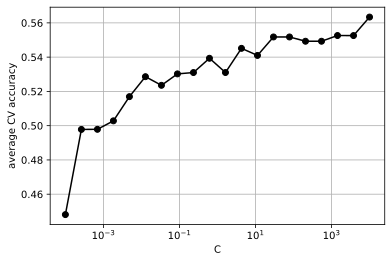

In [ ]:
avgscores = mean(logreg.scores_['Colorectum'],0)  # 2 is the class label
plt.semilogx(logreg.Cs_, avgscores, 'ko-')
plt.xlabel('C'); plt.ylabel('average CV accuracy'); plt.grid(True)
model_evaluation(logreg,X_res, y_res)

In [ ]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import os
import zipfile
import fnmatch
random.seed(100)
import skimage.io
import skimage.color
import skimage.transform
from scipy import ndimage
import numpy as np
import pandas as pd
import albumentations as A
import cv2
import warnings  
warnings.filterwarnings('ignore')

XGBoosting:

In [ ]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import os
import zipfile
import fnmatch
random.seed(100)
import skimage.io
import skimage.color
import skimage.transform
from scipy import ndimage
import numpy as np
import pandas as pd
import albumentations as A
import cv2
import warnings  
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import *
from scipy import stats
random.seed(100)
import csv
from scipy import io
import pickle
from IPython.display import Audio, display
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
!pip install --user scikit-plot

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
#import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [ ]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

NameError: ignored

In [ ]:
data = pd.read_csv('BinaryRFfeature.csv')
data

FileNotFoundError: ignored

In [ ]:
x = data.iloc[:,:17].values
y = data.iloc[:,-1].values
x

array([[5.09, 16.452, 1938.654, ..., '21863.74', 2.96, 60],
       [7.27, 40.91, 1938.654, ..., '29669.66', 2.45, 59],
       [4.854, 16.452, 1976.94, ..., '6020.47', 1.22, 69],
       ...,
       [30.48, 16.44, 3590.0, ..., '599.4', 7.96, 60],
       [1469.45, 62.26, 50659.05, ..., '6864.33', 0.81, 49],
       [1428.31, 37.9, 3060.0, ..., '12877.1', 1.43, 60]], dtype=object)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_pre=cross_val_predict(xgb, x, y, cv=10)
ac = metrics.accuracy_score(y, xgb_pre)
print("XGB CV accuracy = " + str(ac))
classReport=classification_report(y, xgb_pre)
print(classReport)
cm=confusion_matrix(y, xgb_pre)
print(cm)
xgb_proba = cross_val_predict(xgb, x, y, cv=10, method='predict_proba')

ValueError: ignored

**Deep Learning:**

In [ ]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow     
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import struct

%env KERAS_BACKEND=tensorflow     
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import struct

# use keras backend (K) to force channels-first ordering
K.set_image_data_format('channels_first')

env: KERAS_BACKEND=tensorflow
env: KERAS_BACKEND=tensorflow


In [ ]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list ofaavailable GPU devices.#
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

ModuleNotFoundError: ignored

In [ ]:
sd1 = pd.read_csv('FullDataset.csv')
x=sd1.iloc[:,4:44]
x
y=sd1.iloc[:,47]
x.shape
z=np.array(x)
z=z.reshape(1817,1,8,5)
z.shape

(1817, 1, 8, 5)

In [ ]:
# generate fixed validation set of 10% of the training set
vtrainI, validI, vtrainYb, validYb = \
  model_selection.train_test_split(z, y, 
  train_size=0.9, test_size=0.1, random_state=4488)

# make validation data
validsetI = (validI, validYb)

print(vtrainI.shape)
print(validI.shape)

(1635, 1, 8, 5)
(182, 1, 8, 5)


In [ ]:
def plot_history(history): 
    fig, ax1 = plt.subplots()
    
    ax1.plot(history.history['loss'], 'r', label="training loss ({:.6f})".format(history.history['loss'][-1]))
    ax1.plot(history.history['val_loss'], 'r--', label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    ax1.grid(True)
    ax1.set_xlabel('iteration')
    ax1.legend(loc="best", fontsize=9)    
    ax1.set_ylabel('loss', color='r')
    ax1.tick_params('y', colors='r')

    if 'acc' in history.history:
        ax2 = ax1.twinx()

        ax2.plot(history.history['acc'], 'b', label="training acc ({:.4f})".format(history.history['acc'][-1]))
        ax2.plot(history.history['val_acc'], 'b--', label="validation acc ({:.4f})".format(history.history['val_acc'][-1]))

        ax2.legend(loc="best", fontsize=9)
        ax2.set_ylabel('acc', color='b')        
        ax2.tick_params('y', colors='b')

In [ ]:
random.seed(4487); 
tf.random.set_seed(4487)

# build the network
nn = Sequential()
nn.add(Conv2D(10, (5,5),        # channel, kernel size
              strides=(2,2),    # stride
              activation='relu',
              padding='same',   # convolution padding
              input_shape=(1,8,5)
              ))
nn.add(Flatten())   # flatten the feature map into a vector to apply Dense layers
nn.add(Dense(units=10, activation='relu'))
nn.add(Dense(units=10, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))


# setup early stopping callback function
earlystop = keras.callbacks.EarlyStopping(
    monitor='val_loss',     # look at the validation loss
    min_delta=0.0001,       # threshold to consider as no change
    patience=5,             # stop if 5 epochs with no change
    verbose=1, mode='auto'
)
callbacks_list = [earlystop]

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True), 
          metrics=['accuracy'])
history = nn.fit(vtrainI, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validsetI, verbose=True)

plot_history(history)
predY = nn.predict_classes(testI, verbose=False)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy:", acc)

ValueError: ignored

In [ ]:
x

,'AFP (pg/ml)','Angiopoietin-2 (pg/ml)','AXL (pg/ml)','CA-125 (U/ml)','CA 15-3 (U/ml)','CA19-9 (U/ml)','CD44 (ng/ml)','CEA (pg/ml)','CYFRA 21-1 (pg/ml)','DKK1 (ng/ml)','Endoglin (pg/ml)','FGF2 (pg/ml)','Follistatin (pg/ml)','Galectin-3 (ng/ml)','G-CSF (pg/ml)','GDF15 (ng/ml)','HE4 (pg/ml)','HGF (pg/ml)','IL-6 (pg/ml)','IL-8 (pg/ml)','Kallikrein-6 (pg/ml)','Leptin (pg/ml)','Mesothelin (ng/ml)','Midkine (pg/ml)','Myeloperoxidase (ng/ml)','NSE (ng/ml)','OPG (ng/ml)','OPN (pg/ml)','PAR (pg/ml)','Prolactin (pg/ml)','sEGFR (pg/ml)','sFas (pg/ml)','SHBG (nM)','sHER2/sEGFR2/sErbB2 (pg/ml)','sPECAM-1 (pg/ml)','TGFa (pg/ml)','Thrombospondin-2 (pg/ml)','TIMP-1 (pg/ml)','TIMP-2 (pg/ml)','Omega Score'
0,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.10,1938.654,0.78,2882.65,92.02,2144.33,11.19,131.46,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,2.96
1,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.40,1938.654,0.77,3921.77,164.06,1646.26,9.90,131.46,2.39,5779.110,659.68,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,2.45
2,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.80,1976.940,0.90,2410.16,154.77,2486.88,11.61,131.46,0.50,3857.712,329.07,11.316,35.060,3338.6,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1.22
3,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.50,1938.654,0.64,1284.96,227.57,829.43,4.80,152.24,0.19,7819.170,266.66,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856,6121.93,16.086,4331.02,20441.19,25896.73,1.64
4,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.50,1938.654,0.78,2552.72,134.72,2168.23,8.92,131.46,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.9,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,3.05,1113.68,221.80,875.57,8.51,133.08,0.41,4113.462,284.34,10.500,12.830,5376.57,66095.36,17.71,679.06,30.18,9.72,0.46,38603.84,16717.38,58266.97,2542.26,207.24,115.24,5390.31,8538.58,16.890,599.4,167799.61,50128.60,0.98
1813,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.50,1970.916,1.74,1702.42,234.20,573.21,19.76,32.802,0.34,4113.462,374.03,10.500,8.274,6774.89,75175.83,21.95,524.17,39.62,79.03,0.44,29994.01,2656.02,187828.79,1670.22,207.24,147.17,7951.03,12966.19,16.890,599.4,123443.76,54066.98,3.92
1814,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3590.000,0.73,499.81,91.06,650.95,8.67,32.802,0.86,48893.330,309.22,10.500,11.160,7294.52,10713.71,37.91,467.4,11.93,4.30,0.29,93601.15,7127.74,241440.02,1194.03,207.24,104.63,2396.36,1901.41,16.890,599.4,104070.89,39844.02,7.96
1815,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,1.24,2219.60,143.09,1033.29,6.69,104,0.69,16014.510,1153.70,20.330,20.540,6212.68,6468.71,8.26,916.6,64.83,19.52,0.52,145116.62,8954.41,140145.70,1607.16,207.24,73.55,3079.81,5312.9,16.890,6864.33,110579.24,42921.13,0.81


In [ ]:
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=10, n_jobs=-1)
logreg.fit(x, y)
print("C =", logreg.C_)
# calculate the average score for each C
avgscores = mean(logreg.scores_['Healthy'],0)  # 2 is the class label
plt.semilogx(logreg.Cs_, avgscores, 'ko-')
plt.xlabel('C'); plt.ylabel('average CV accuracy'); plt.grid(True)
lr_pre=cross_val_predict(logreg, x, y, cv=10)
ac = metrics.accuracy_score(y, lr_pre)
print("RF CV accuracy = " + str(ac))
classReport=classification_report(y, lr_pre)
print(classReport)
cm=confusion_matrix(y, lr_pre)
print(cm)
lr_proba = cross_val_predict(logreg, x, y, cv=10, method='predict_proba')